In [7]:
#ADALINE - wagi są aktualizowane na podstawie liniowej funkcji
#aktywacji, a nie funkcji skoku jednostkowego
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class AdalineGD(object):
    """Klasyfikator - ADaptacyjny LIniowy NEuron

    Parametry
    --------
    eta: zmiennoprzecinkowy
        współczynnik uczenia (0.0 - 1.0)
    n_iter: liczba całkowita
            Liczba przebiegów po training set
    random_state: liczba całkowita
            ziarno generatora liczb losowych
    
    Atrybuty
    -------
    w_: jednowymiarowa tablica
        wagi po dopasowaniu
    cost_: lista
            suma kwadratów błędów w każdej epoce
    """

    def __init__ (self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Trenowanie za pomocą danych uczących

        Parametry
        --------
        X: {tablicopodobny}, wymiary [n_probek, n_cech]
            wektory uczenia
        y: {tablicopodobny}, wymiary [n_probek]
            wartości docelowe
        Zwraca
        -----
        self: obiekt
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Oblicza całkowite pobudzenie"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Oblicza liniową funkcję aktywacji"""
        return X

    def predict(self, X):
        """Zwraca rtykietę klas po wykonaniu skoku jednostkowego"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy
#dane są posegregowane 
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
     header=None)

#wybieramy 2 odmiany i zamieniamy je na 1 i -1
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

#tu wybieramy działki i długość płatka
X = df.iloc[0:100, [0, 2]].values

In [18]:
# zobaczymy jak wygląda granica przebiegająca między etykietami
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    #konfiguracja generatora znaczników i mapy kolorów

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #wykresy powierzchni decyzyjnej
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #narysuj wykres z próbkami

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=colors[idx],
            marker=markers[idx], label=cl,
            edgecolor='black')


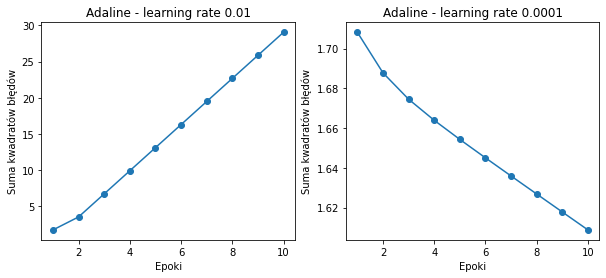

In [13]:
#wykres ze skutecznością w zależności od learning rate
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
adal = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(adal.cost_) +1),
    np.log10(adal.cost_), marker='o')
ax[0].set_xlabel('Epoki')
ax[0].set_ylabel('Suma kwadratów błędów')
ax[0].set_title('Adaline - learning rate 0.01')

adal2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(adal2.cost_) +1),
    np.log10(adal2.cost_), marker='o')
ax[1].set_xlabel('Epoki')
ax[1].set_ylabel('Suma kwadratów błędów')
ax[1].set_title('Adaline - learning rate 0.0001')
plt.show()

In [ ]:
#teraz wykonamy standaryzację na danych by gradient mógł szybciej 
#znaleźć minimum funkcji kosztu

In [23]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

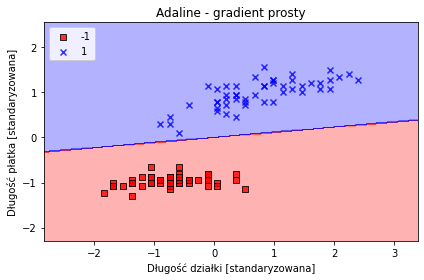

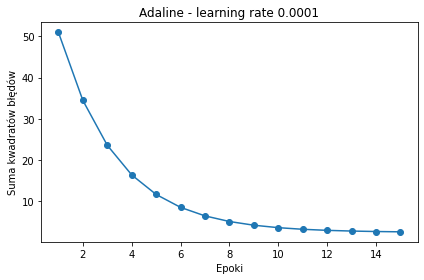

In [25]:
ada = AdalineGD(n_iter=15, eta=0.01).fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - gradient prosty')
plt.xlabel("Długość działki [standaryzowana]")
plt.ylabel("Długość płatka [standaryzowana]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) +1),
    ada.cost_, marker='o')
plt.xlabel('Epoki')
plt.ylabel('Suma kwadratów błędów')
plt.title('Adaline - learning rate 0.0001')
plt.tight_layout()
plt.show()